### Module Import

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib 

from sklearn import model_selection, metrics
# from __future__ import print_function
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.python.client import device_lib
import keras.backend.tensorflow_backend as K
from keras import layers, models
#word_tokenizing
import re
import os
from imblearn.over_sampling import SMOTE
# preprocessing
from nltk import word_tokenize, sent_tokenize
# using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem import PorterStemmer,LancasterStemmer,WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk_data.corpora import wordnet

### Text data tokenizing

#### Data input

In [ ]:
input_data = '/home/DMLAB/.jupyter/DMLAB/jihoon/2020JIPS/Data/tripad_data.csv'
raw_data = pd.read_csv(input_data)
raw_data = raw_data.dropna(axis=0) # Delete nan rows
raw_data = raw_data.drop(["Unnamed: 0"], axis=1) # Delete Unnamed: 0 row
print(raw_data.head)
raw_data = raw_data.reset_index()
raw_data = raw_data.drop(["index"], axis=1)
print(raw_data.head)

#### Stopwords Apply

In [ ]:
#english (Stopwords file)
english_file = open('english', mode='r')
english_data = english_file.readlines()
english_text = []

for i in english_data:
    english_text.append(i[:-1])

english_text

In [ ]:
# Stopwords Removement
def clean_review(text):
    review_text = re.sub("[^a-zA-Z]", " ", text)
    word_tokens = review_text.lower().split()
    word_tokens = review_text.lower().split()
    le = WordNetLemmatizer()
    stop_words = set(english_text)
    word_tokens = [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    cleaned_review = " ".join(word_tokens)
    
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    cleaned_review = shortword.sub('', cleaned_review)
    
    return cleaned_review

# Stopwords Apply
raw_data['Content'] = raw_data.iloc[:, 15].apply(clean_review)
raw_data.head

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
raw_data['Content'] = raw_data['Content'].astype('str')
raw_data["Content"] = raw_data["Content"].apply(tokenizer.tokenize)

In [7]:
content_list = np.array(raw_data['Content'].tolist())
print(content_list)

,Author,HotelInfo.HotelID,Service,Cleanliness,Value,Sleep Quality,Rooms,Location,Content,Date
0,Clara79,280518,3,3,4,4.0,3.0,3.0,"['hotel', 'bit', 'surprise', 'could', 'find', ...","September 22, 2004"
1,BerlinerPooh,280518,1,1,1,1.0,0.0,1.0,"['room', 'adequate', 'little', 'drab', 'side',...","January 18, 2005"
2,amazingthing,280518,2,4,3,4.0,3.0,3.0,"['first', 'read', 'review', 'side', 'booking',...","May 10, 2005"
3,Nitus,280518,4,4,5,5.0,0.0,0.0,"['one', 'night', 'stay', 'artus', 'hotel', 'be...","October 23, 2005"
4,mattp1874,280518,4,5,4,5.0,4.0,5.0,"['stayed', 'hotel', 'night', 'ok', 'missing', ...","March 12, 2007"
...,...,...,...,...,...,...,...,...,...,...
355167,Posted by an Accorhotels.com traveler,289861,3,4,3,0.0,4.0,2.0,"['stayed', 'week', 'rustica', 'child', 'year',...","October 28, 2011"
355168,Posted by an Accorhotels.com traveler,289861,3,4,5,0.0,4.0,1.0,"['superb', 'stay', 'novotel', 'although', 'out...","November 4, 2011"
355169,paulpowell3540,289861,4,5,4,0.0,5.0,0.0,"['yes', 'distance', 'rome', 'however', 'hotel'...","November 10, 2011"
355170,uclabobby,289861,5,5,5,0.0,5.0,0.0,"['hotel', 'nice', 'look', 'nice', 'room', 'com...","January 2, 2012"


### Data Tokenizing & word_indexing

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content_list)

ipc_Xdata = np.array(tokenizer.texts_to_sequences(content_list))
print(ipc_Xdata)
print(ipc_Xdata.shape)

ipc_Ydata = np.array(raw_data[['Service', 'Cleanliness','Value',
                               'Sleep Quality','Rooms','Location']])
print(ipc_Ydata)
print(ipc_Ydata.shape)

{"'room'": 1,
 "'hotel'": 2,
 "'great'": 3,
 "'stay'": 4,
 "'would'": 5,
 "'staff'": 6,
 "'good'": 7,
 "'night'": 8,
 "'one'": 9,
 "'time'": 10,
 "'u'": 11,
 "'nice'": 12,
 "'day'": 13,
 "'stayed'": 14,
 "'get'": 15,
 "'location'": 16,
 "'clean'": 17,
 "'service'": 18,
 "'breakfast'": 19,
 "'bed'": 20,
 "'pool'": 21,
 "'also'": 22,
 "'place'": 23,
 "'restaurant'": 24,
 "'like'": 25,
 "'area'": 26,
 "'well'": 27,
 "'really'": 28,
 "'could'": 29,
 "'back'": 30,
 "'go'": 31,
 "'small'": 32,
 "'bathroom'": 33,
 "'friendly'": 34,
 "'food'": 35,
 "'walk'": 36,
 "'view'": 37,
 "'floor'": 38,
 "'even'": 39,
 "'two'": 40,
 "'check'": 41,
 "'desk'": 42,
 "'minute'": 43,
 "'got'": 44,
 "'helpful'": 45,
 "'resort'": 46,
 "'comfortable'": 47,
 "'front'": 48,
 "'much'": 49,
 "'little'": 50,
 "'bar'": 51,
 "'first'": 52,
 "'free'": 53,
 "'people'": 54,
 "'price'": 55,
 "'next'": 56,
 "'around'": 57,
 "'lot'": 58,
 "'right'": 59,
 "'trip'": 60,
 "'beach'": 61,
 "'thing'": 62,
 "'best'": 63,
 "'excelle

### Data Split & Get maxlen and max_features

In [12]:
train_x, test_x, train_y, test_y = train_test_split(ipc_Xdata, ipc_Ydata, 
                                                    test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(248620,) (106552,) (248620, 6) (106552, 6)


In [13]:
maxlen = 1
max_features = 1
for idx in ipc_Xdata :
    try :
        len_ = len(idx) #print(idx)
        max_ = np.max(idx)
    except :
        #print(idx)
        continue
    #print(type(max_))
    #break
    if max_features < max_ :
        max_features = max_
    if maxlen < len_ :
        maxlen = len_
print(maxlen)
print(max_features)

2670
148649


### Model building

#### Padding

In [15]:
print('Loading data...')

print(len(train_x), 'train sequences')
print(len(test_x), 'test sequences')

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

print('Pad sequences (samples x time)')

train_x = sequence.pad_sequences(train_x, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x, maxlen=maxlen)
print('train_x shape:', train_x.shape)
print('test_x shape:', test_x.shape)

Loading data...
248620 train sequences
106552 test sequences
(248620,) (106552,) (248620, 6) (106552, 6)
Pad sequences (samples x time)
train_x shape: (248620, 2670)
test_x shape: (106552, 2670)


#### variables setting

In [303]:
# Embedding
max_features = 148650 # feature 값 변경
maxlen = 2670 # 리뷰의 길이
embedding_size = 128

# Convolution
kernel_size = 5 # 1
filters = 128 # 256
pool_size = 4

# LSTM
lstm_output_size = 10

# Training
batch_size = 500 # 310 #30 -> 20
epochs = 1

#### Model Building

In [304]:
print('Build model...')
#model = Sequential()
input_layer = layers.Input((maxlen,))

embedding_layer = layers.Embedding(max_features, 64)(input_layer)

convolution_layer = layers.Conv1D(32, 3, padding = 'valid',
                                 activation='relu', strides=1)(embedding_layer)

maxpooling_layer = layers.MaxPooling1D(pool_size)(convolution_layer)

lstm_layer = layers.Bidirectional(layers.CuDNNLSTM(16, return_sequences=True))(maxpooling_layer)

dropout_layer = layers.Dropout(0.25)(lstm_layer) 

flatten_layer = layers.Flatten()(dropout_layer)

output_layer1 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)
output_layer2 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)
output_layer3 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)
output_layer4 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)
output_layer5 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)
output_layer6 = layers.Dense(1, activation = 'sigmoid')(flatten_layer)

model = models.Model(inputs=input_layer, outputs=
                     [output_layer1, output_layer2, output_layer3, output_layer4,
                      output_layer5, output_layer6])
model.summary()

model.compile(loss='mse', 
              optimizer='rmsprop',
              metrics=['accuracy'])

Build model...
Model: "model_48"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_48 (InputLayer)           (None, 2670)         0                                            
__________________________________________________________________________________________________
embedding_48 (Embedding)        (None, 2670, 64)     9513600     input_48[0][0]                   
__________________________________________________________________________________________________
conv1d_48 (Conv1D)              (None, 2668, 32)     6176        embedding_48[0][0]               
__________________________________________________________________________________________________
max_pooling1d_48 (MaxPooling1D) (None, 667, 32)      0           conv1d_48[0][0]                  
____________________________________________________________________________

#### Train

In [305]:
with K.tf.device('/gpu:0'):
    print('Train...')
    hist = model.fit(train_x, [train_y[:,0]/5, train_y[:,1]/5, 
                               train_y[:,2]/5, train_y[:,3]/5, 
                               train_y[:,4]/5, train_y[:,5]/5],
                     batch_size=batch_size,
                     epochs=epochs)
    
   # score, acc = model.evaluate(test_x, test_y[:,0:6], 
   #                             batch_size=batch_size)
    
    score = model.evaluate(test_x, [test_y[:,0]/5, test_y[:,1]/5,
                                     test_y[:,2]/5, test_y[:,3]/5,
                                     test_y[:,4]/5, test_y[:,5]/5], 
                            batch_size = batch_size)
    
    predicted = model.predict(test_x)
    
    print('Test score:', score)
    print('Test accuracy:', acc)

Train...
Epoch 1/100
248620/248620 [==============================] - 49s 197us/step - loss: 0.7989 - dense_88_loss: 0.1078 - dense_89_loss: 0.1034 - dense_90_loss: 0.1053 - dense_91_loss: 0.1884 - dense_92_loss: 0.1328 - dense_93_loss: 0.1611 - dense_88_acc: 0.4321 - dense_89_acc: 0.4851 - dense_90_acc: 0.3738 - dense_91_acc: 0.5074 - dense_92_acc: 0.3197 - dense_93_acc: 0.4529
Epoch 2/100
248620/248620 [==============================] - 46s 185us/step - loss: 0.7710 - dense_88_loss: 0.1034 - dense_89_loss: 0.0988 - dense_90_loss: 0.1017 - dense_91_loss: 0.1802 - dense_92_loss: 0.1288 - dense_93_loss: 0.1581 - dense_88_acc: 0.4333 - dense_89_acc: 0.4863 - dense_90_acc: 0.3740 - dense_91_acc: 0.5176 - dense_92_acc: 0.3245 - dense_93_acc: 0.4539
Epoch 3/100
248620/248620 [==============================] - 46s 184us/step - loss: 0.7409 - dense_88_loss: 0.0993 - dense_89_loss: 0.0949 - dense_90_loss: 0.0979 - dense_91_loss: 0.1707 - dense_92_loss: 0.1241 - dense_93_loss: 0.1540 - dense_88

248620/248620 [==============================] - 46s 184us/step - loss: 0.1809 - dense_88_loss: 0.0313 - dense_89_loss: 0.0280 - dense_90_loss: 0.0300 - dense_91_loss: 0.0325 - dense_92_loss: 0.0282 - dense_93_loss: 0.0308 - dense_88_acc: 0.5135 - dense_89_acc: 0.5658 - dense_90_acc: 0.4547 - dense_91_acc: 0.7245 - dense_92_acc: 0.4813 - dense_93_acc: 0.6615
Epoch 44/100
248620/248620 [==============================] - 46s 184us/step - loss: 0.1793 - dense_88_loss: 0.0310 - dense_89_loss: 0.0277 - dense_90_loss: 0.0297 - dense_91_loss: 0.0325 - dense_92_loss: 0.0279 - dense_93_loss: 0.0305 - dense_88_acc: 0.5137 - dense_89_acc: 0.5662 - dense_90_acc: 0.4550 - dense_91_acc: 0.7247 - dense_92_acc: 0.4816 - dense_93_acc: 0.6619
Epoch 45/100
248620/248620 [==============================] - 46s 184us/step - loss: 0.1768 - dense_88_loss: 0.0307 - dense_89_loss: 0.0274 - dense_90_loss: 0.0294 - dense_91_loss: 0.0318 - dense_92_loss: 0.0276 - dense_93_loss: 0.0299 - dense_88_acc: 0.5136 - dens

248620/248620 [==============================] - 46s 184us/step - loss: 0.1289 - dense_88_loss: 0.0232 - dense_89_loss: 0.0204 - dense_90_loss: 0.0220 - dense_91_loss: 0.0215 - dense_92_loss: 0.0209 - dense_93_loss: 0.0208 - dense_88_acc: 0.5175 - dense_89_acc: 0.5706 - dense_90_acc: 0.4590 - dense_91_acc: 0.7321 - dense_92_acc: 0.4850 - dense_93_acc: 0.6693
Epoch 86/100
248620/248620 [==============================] - 46s 184us/step - loss: 0.1279 - dense_88_loss: 0.0230 - dense_89_loss: 0.0204 - dense_90_loss: 0.0219 - dense_91_loss: 0.0213 - dense_92_loss: 0.0208 - dense_93_loss: 0.0206 - dense_88_acc: 0.5179 - dense_89_acc: 0.5706 - dense_90_acc: 0.4591 - dense_91_acc: 0.7325 - dense_92_acc: 0.4851 - dense_93_acc: 0.6696
Epoch 87/100
248620/248620 [==============================] - 46s 184us/step - loss: 0.1279 - dense_88_loss: 0.0229 - dense_89_loss: 0.0203 - dense_90_loss: 0.0217 - dense_91_loss: 0.0214 - dense_92_loss: 0.0208 - dense_93_loss: 0.0207 - dense_88_acc: 0.5178 - dens

In [306]:
print(len(test_x))
print(len(predicted))
arr_predicted = np.array(predicted)
print(arr_predicted.shape)
print(arr_predicted)

arr = np.squeeze(arr_predicted, 2)
arr = np.transpose(arr)
print(arr.shape)
print('times 5')
# print(arr)
arr = arr * 5
arr = arr.astype('int64')
print(arr.shape)
print(arr)

106552
6
(6, 106552, 1)
[[[7.39243507e-01]
  [7.23880112e-01]
  [9.87041473e-01]
  ...
  [7.80053735e-01]
  [8.50651741e-01]
  [4.34823841e-01]]

 [[8.38103533e-01]
  [7.82479644e-01]
  [9.94454741e-01]
  ...
  [9.34947610e-01]
  [8.89334679e-01]
  [6.32420242e-01]]

 [[6.73874915e-01]
  [4.01344448e-01]
  [9.90164578e-01]
  ...
  [6.90950155e-01]
  [8.07787240e-01]
  [5.18738091e-01]]

 [[2.46644020e-04]
  [7.70089746e-01]
  [9.97917116e-01]
  ...
  [3.53753567e-05]
  [7.32339263e-01]
  [3.66566479e-02]]

 [[6.92426085e-01]
  [8.38288069e-02]
  [1.16491914e-01]
  ...
  [7.96494842e-01]
  [8.41514707e-01]
  [5.87016284e-01]]

 [[8.99296403e-02]
  [7.36715794e-02]
  [3.74117494e-01]
  ...
  [1.44921333e-01]
  [9.08849716e-01]
  [8.38729739e-01]]]
(106552, 6)
times 5
(106552, 6)
[[3 4 3 0 3 0]
 [3 3 2 3 0 0]
 [4 4 4 4 0 1]
 ...
 [3 4 3 0 3 0]
 [4 4 4 3 4 4]
 [2 3 2 0 2 4]]


In [307]:
print(test_y[0])
print(arr[0])

[5. 5. 4. 0. 5. 5.]
[3 4 3 0 3 0]


#### Learning process graph

KeyError: 'acc'

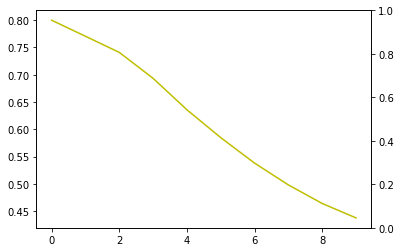

In [302]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
    